<a href="https://colab.research.google.com/github/127-0-0-vvk/Crime_Complaints_data_Visualization/blob/main/Crime_Complaints_mapbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datashader

In [ ]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire, kbc, bmw, gray
import plotly.express as px

<ipython-input-18-b4eaf0c0e5ac>:9: DtypeWarning:

Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.



['BURGLARY' 'THEFT' 'BATTERY' 'ASSAULT' 'NARCOTICS' 'ROBBERY'
 'PROSTITUTION']
(723850, 3)


<ipython-input-18-b4eaf0c0e5ac>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




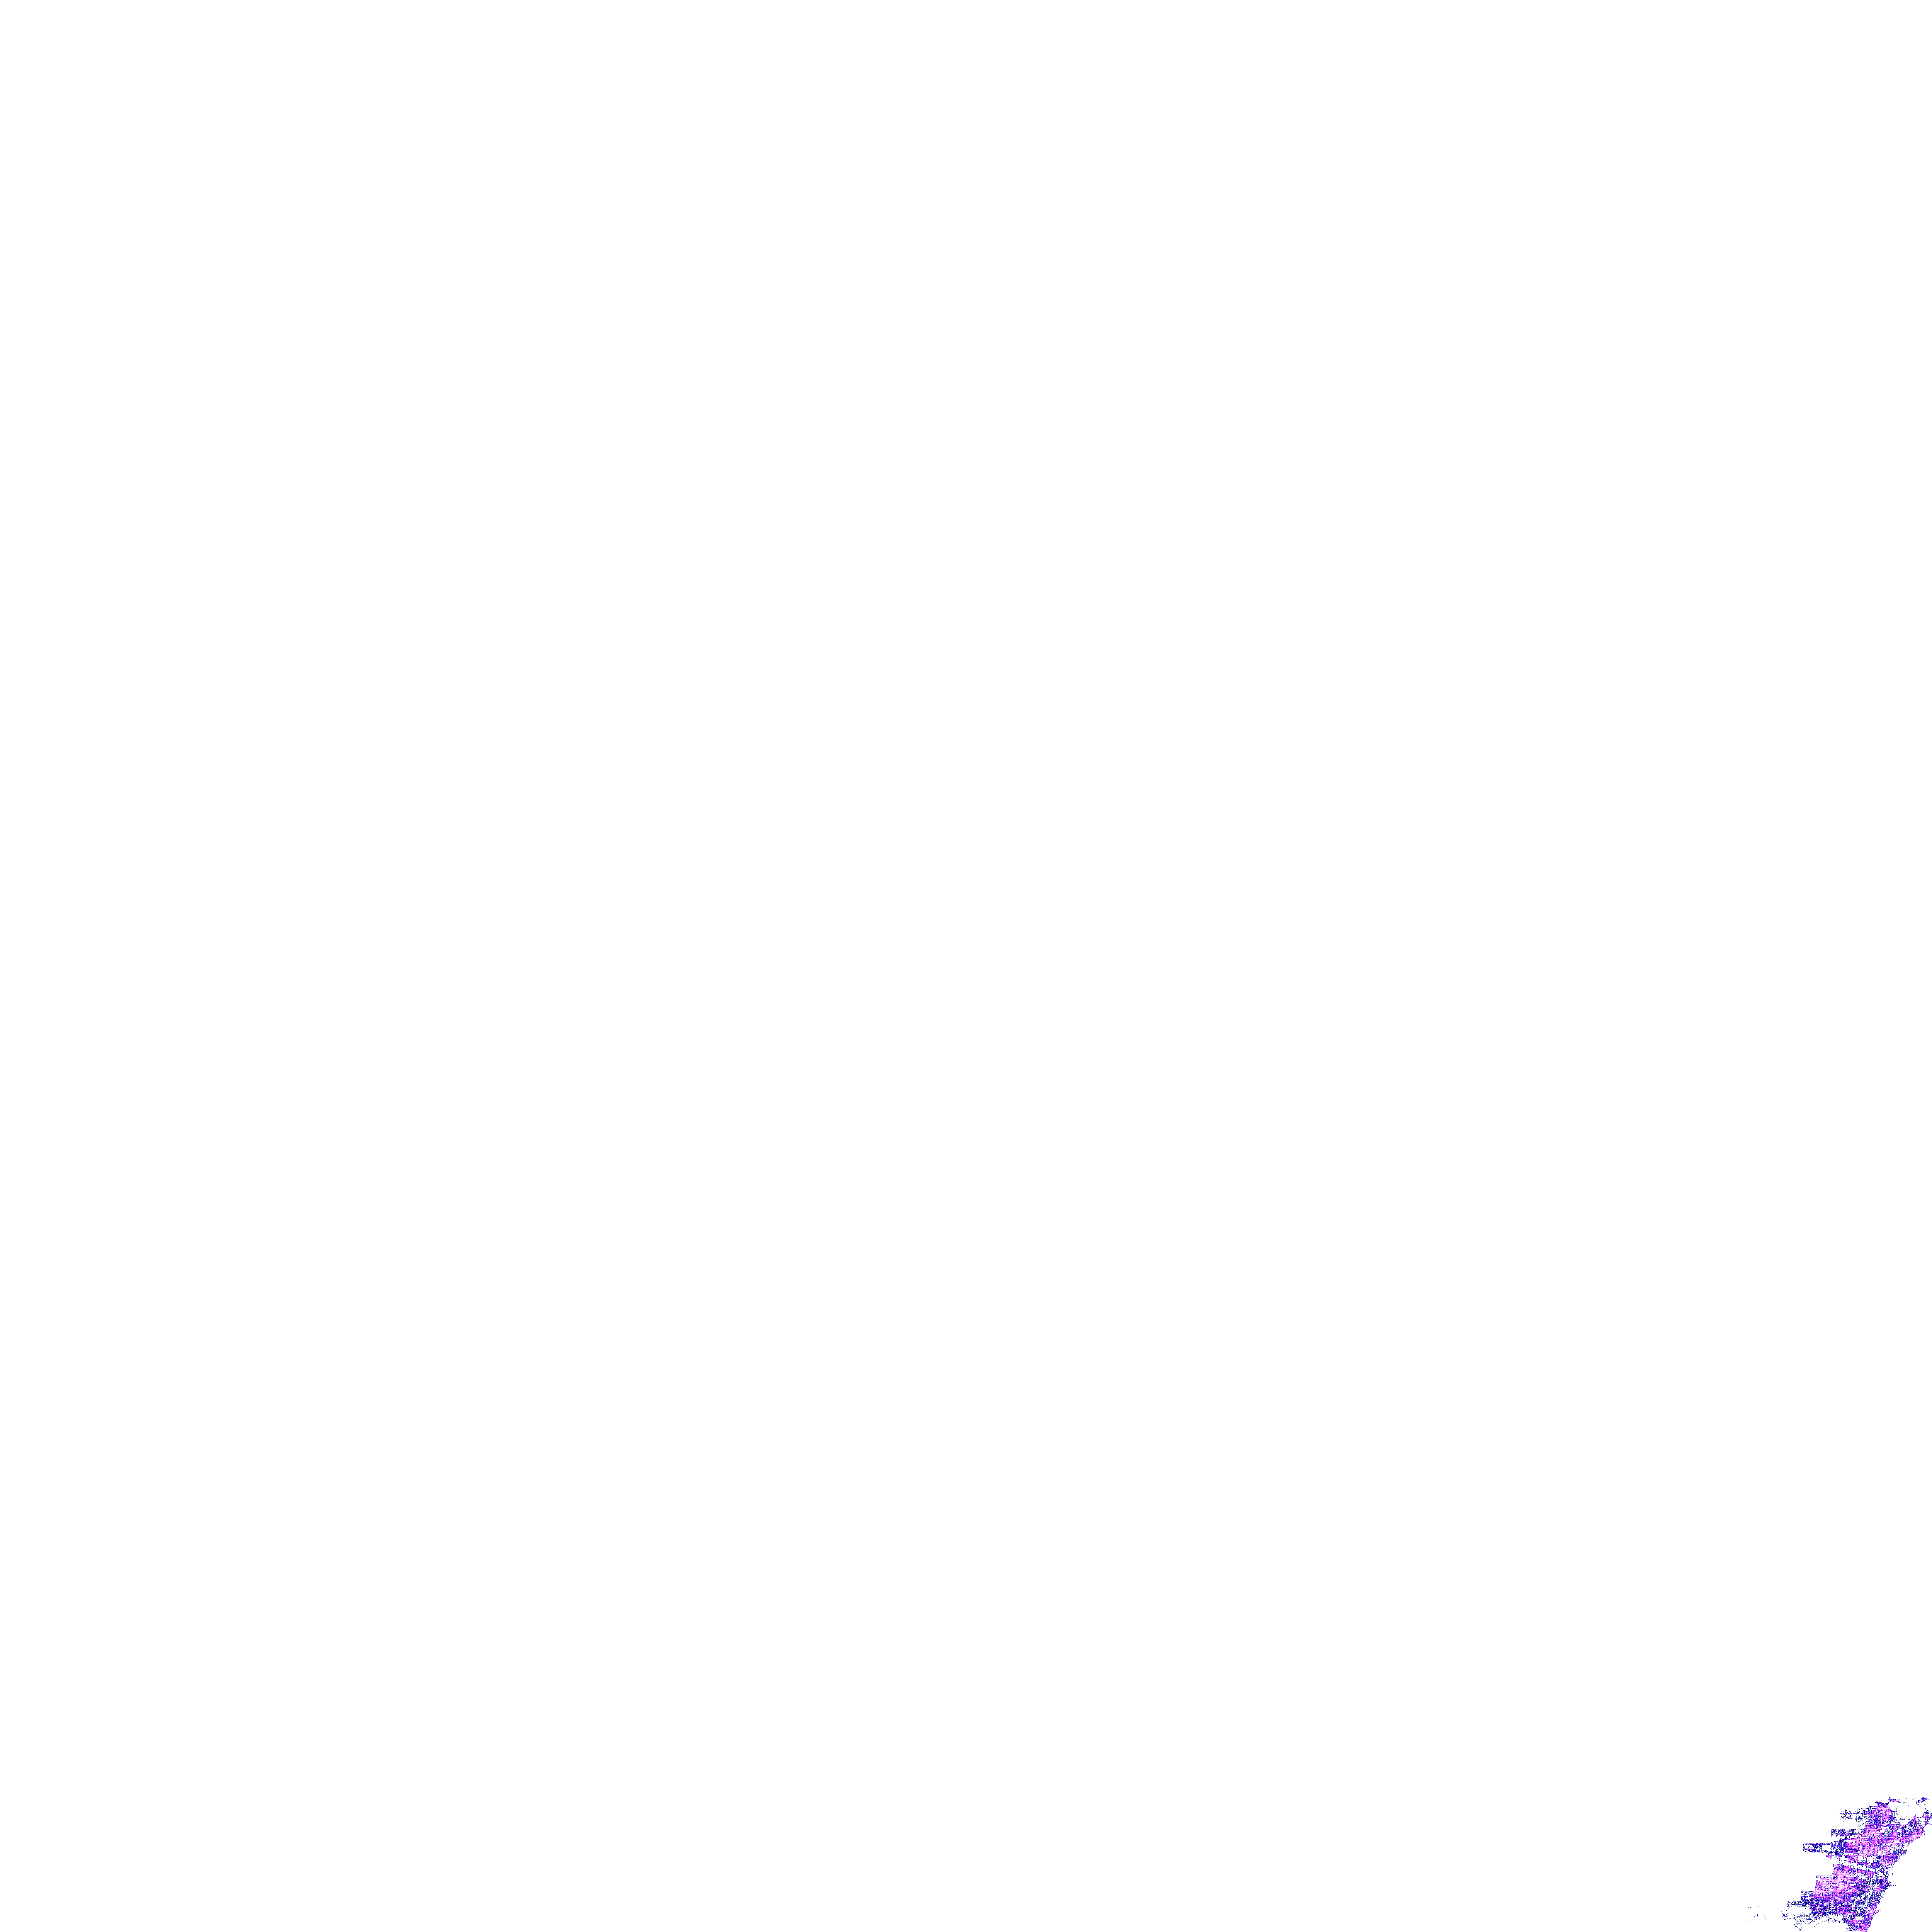

In [ ]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire, kbc, bmw, gray
import plotly.express as px


# Read and filter your dataframe
df = pd.read_csv("Crimes_-_2001_to_Present.csv")
dff = df[['Primary Type', 'Latitude', 'Longitude']]
print(dff['Primary Type'].unique())
dff = dff[dff['Primary Type'].isin(['NARCOTICS'])]
dff.dropna(subset=['Latitude', 'Longitude'], inplace=True)
print(dff.shape)


# Build an abstract canvas representing the space in which to plot data
cvs = ds.Canvas(plot_width=5000, plot_height=5000)

# project the longitude and latitude onto the canvas and
# map the data to pixels as points
aggs = cvs.points(dff, x='Longitude', y='Latitude')

# aggs is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = aggs.coords['Latitude'].values, aggs.coords['Longitude'].values

# Set the corners of the image that need to be passed to the mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]


# Set the image color, and the legend (how) types
# linear (how=linear), logarithmic (how=log), percentile (how=eq_hist)
img = tf.shade(aggs, cmap=gray, how='eq_hist', alpha=255)[::-1].to_pil()

# Create a quick mapbox figure with plotly
fig = px.scatter_mapbox(dff[:1], lat='Latitude', lon='Longitude', zoom=10)

# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                  mapbox_layers=[
                      {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                      }
                  ]
)
fig.show()

<ipython-input-20-7d88da72ba8a>:9: DtypeWarning:

Columns (17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.



(1212048, 4)



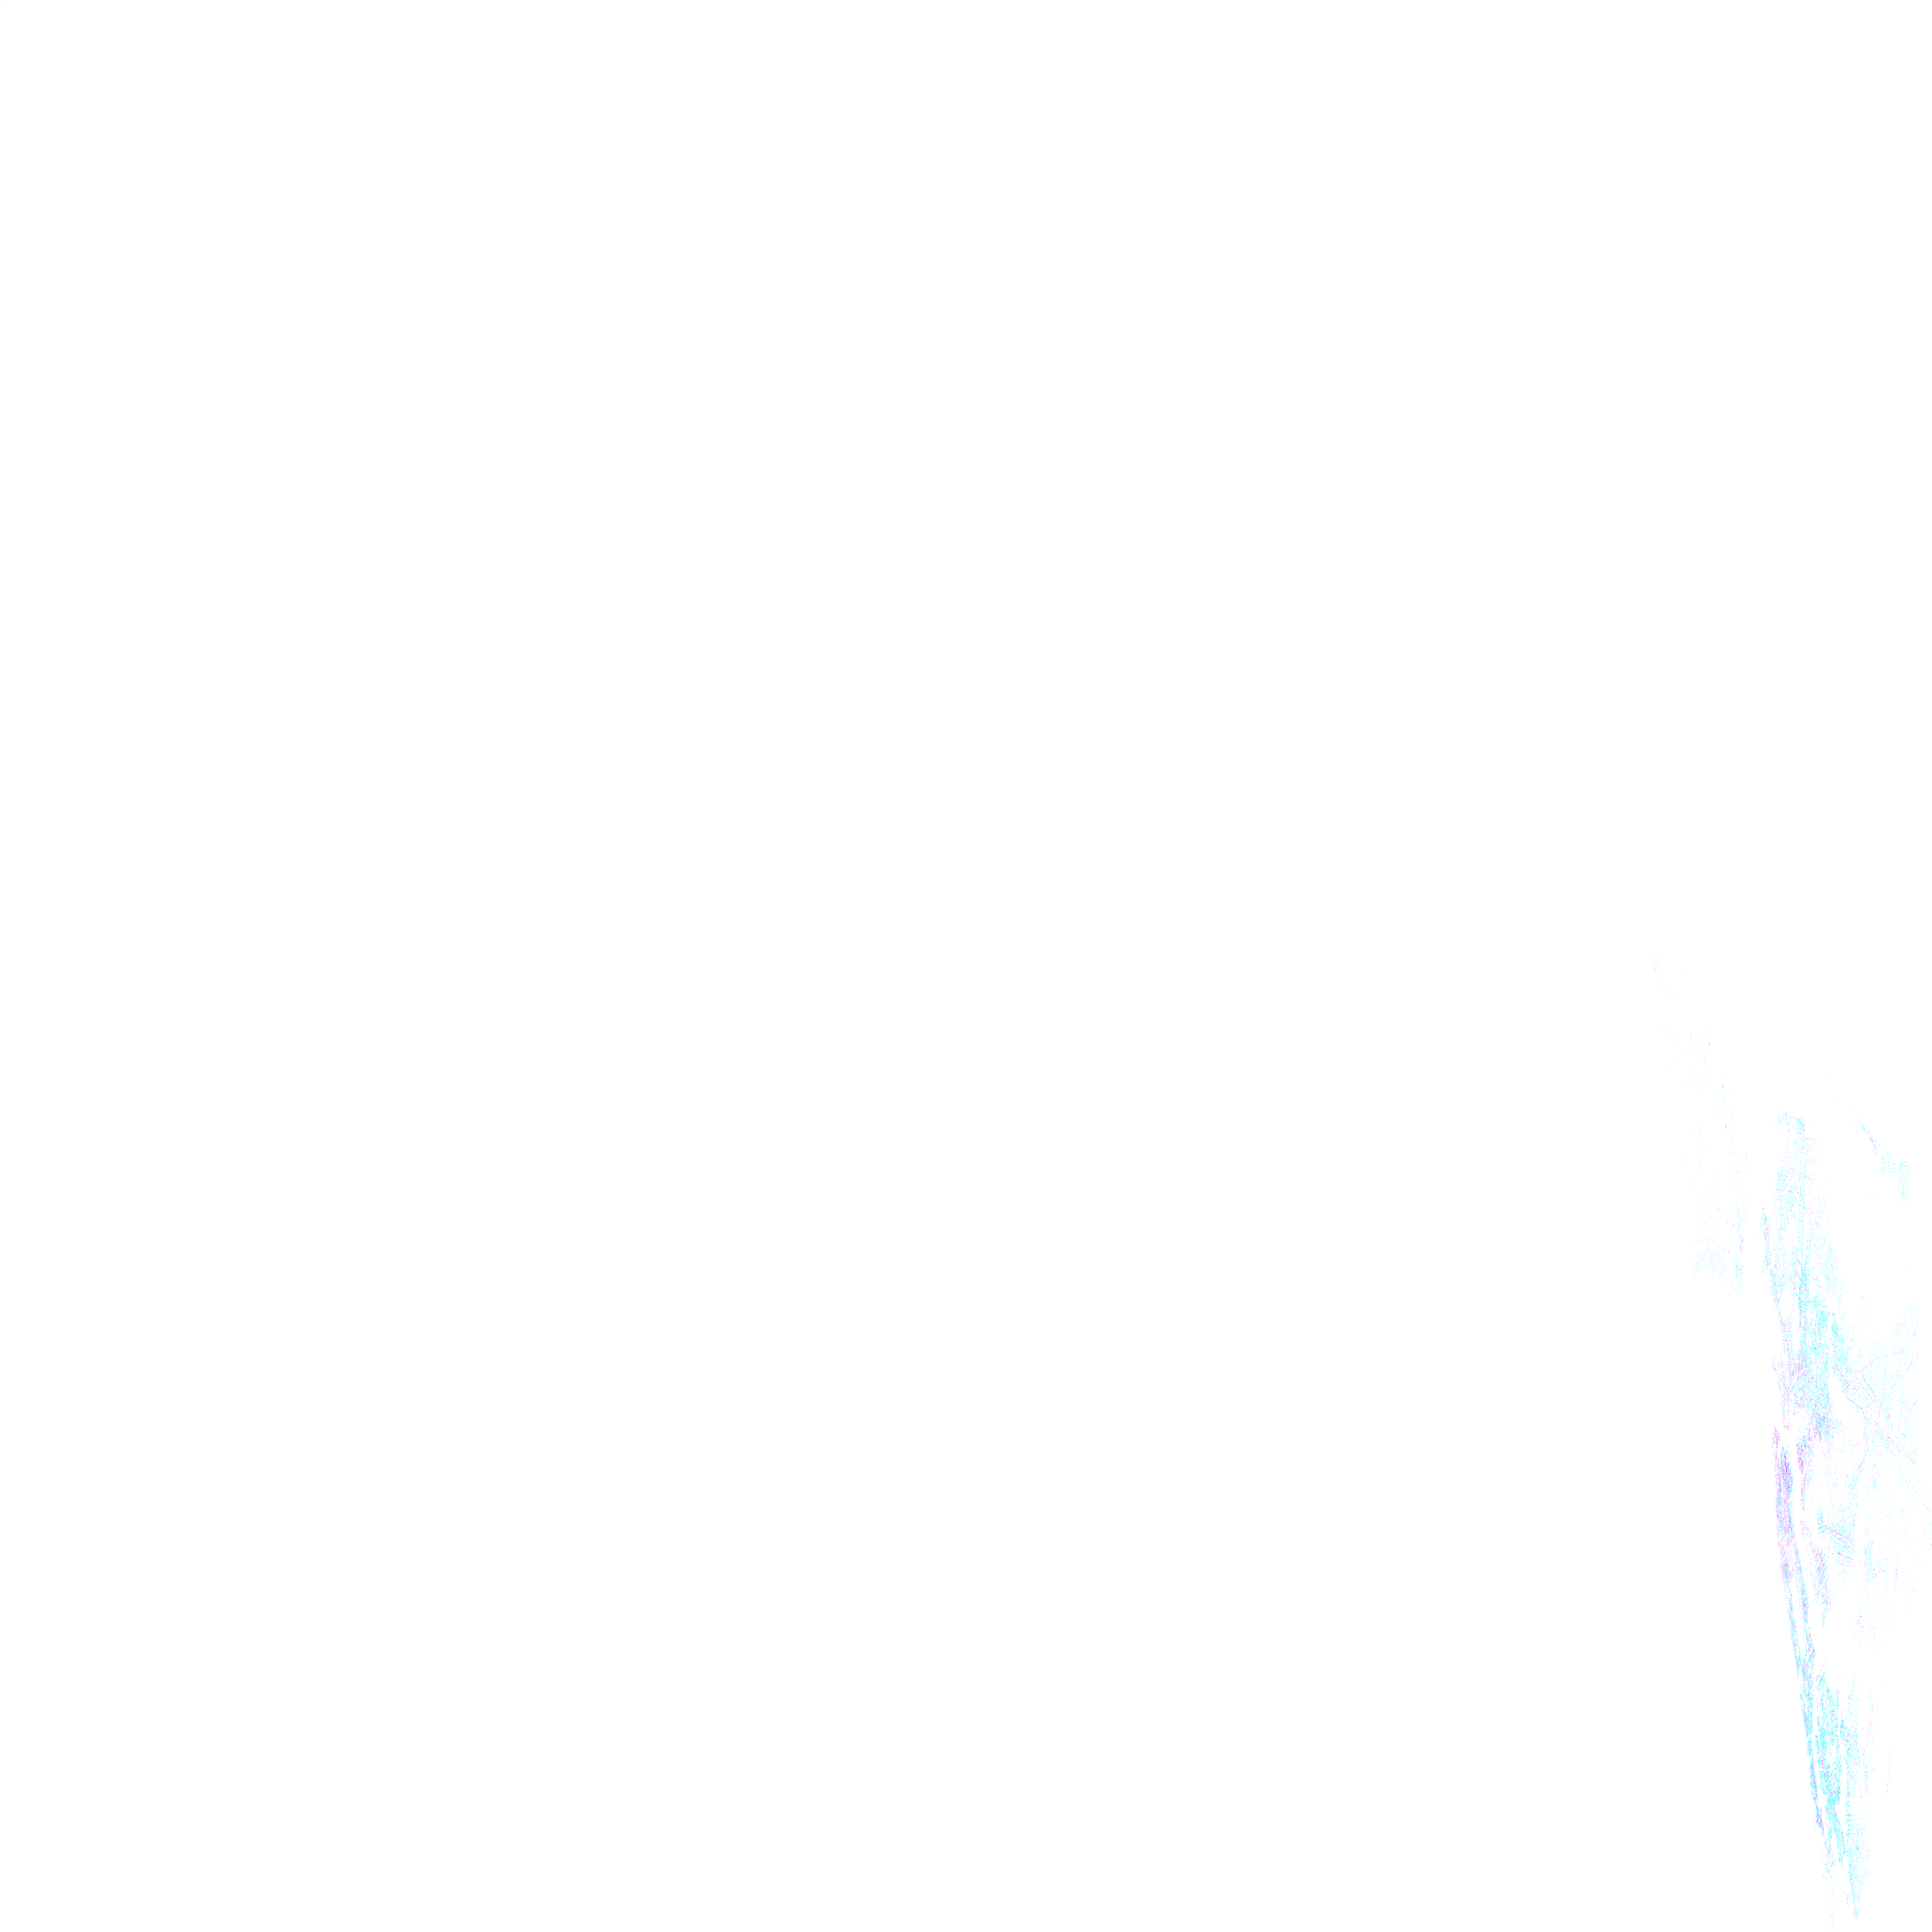

In [ ]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire, kbc, bmw, gray
import plotly.express as px
color_key = {'HEAT/HOT WATER': 'aqua', 'Noise - Commercial': 'fuchsia'}

# Read and filter your dataframe
df = pd.read_csv("311_Service_Requests_from_2016_to_Present.csv")
dff = df[['Complaint Type', 'Latitude', 'Longitude', 'Status']]
types = ['HEAT/HOT WATER',  'Noise - Commercial']
dff = dff[dff['Complaint Type'].isin(types)]
dff['Complaint Type'] = pd.Categorical(dff['Complaint Type'])
print(dff.shape)


# Build an abstract canvas representing the space in which to plot data
cvs = ds.Canvas(plot_width=5000, plot_height=5000)

# project the longitude and latitude onto the canvas and
# map the data to pixels as points

aggs = cvs.points(dff, x='Longitude', y='Latitude', agg=ds.count_cat('Complaint Type'))

# aggs is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = aggs.coords['Latitude'].values, aggs.coords['Longitude'].values

# Set the corners of the image that need to be passed to the mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]


# Set the image color, and the legend (how) types
# linear (how=linear), logarithmic (how=log), percentile (how=eq_hist)

img = tf.shade(aggs, color_key=color_key, how='eq_hist')[::-1].to_pil()


# Create a quick mapbox figure with plotly
fig = px.scatter_mapbox(dff[:1], lat='Latitude', lon='Longitude', zoom=10)

# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                  mapbox_layers=[
                      {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                      }
                  ]
)
fig.show()